In [18]:
import numpy as np
import pandas as pd

import torch
import fastai

In [19]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    cat_names = []
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')
            cat_names.append(col)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df, cat_names

In [27]:
df = pd.read_csv('input_ieee/train.csv')
df = df.dropna(subset=['isFraud'])
train, cat_names = reduce_mem_usage(df)
df = pd.read_csv('input_ieee/test.csv')
df = df.dropna(subset=['isFraud'])
test, cat_names = reduce_mem_usage(df)
test_idx = test.shape[0]
df = pd.concat([train,test])
print(df.shape)

Memory usage of dataframe is 1959.88 MB
Memory usage after optimization is: 530.08 MB
Decreased by 73.0%


KeyError: ['isFraud']

In [4]:
from fastai import *
from fastai.tabular import *

In [22]:
valid_idx = range(len(df)-test_idx, len(df))
print(valid_idx,df.shape)
# cat_names = []
dep_var = 'tempm'

range(590540, 1097231) (1097231, 434)


In [25]:
procs = [FillMissing, Categorify, Normalize]
data = TabularDataBunch.from_df('input_ieee', df, 'isFraud', valid_idx=valid_idx, procs=procs)

IndexError: index 590540 is out of bounds for axis 0 with size 0

In [203]:
learn = tabular_learner(data,[16,16],metrics=mean_absolute_error, callback_fns=ShowGraph)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


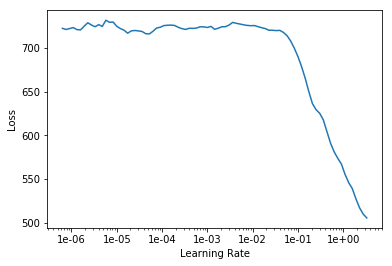

In [204]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,mean_absolute_error,time
0,13.614720,9.502119,2.447743,00:09


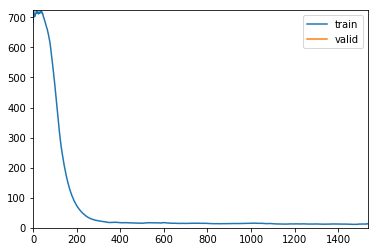

In [205]:
learn.fit_one_cycle(1,1e-1)